# Magic Personality Matcher

Se busca predecir la personalidad del autor de un texto, es decir, se usa texto como entrada y la salida es una de las 16 personalidades de Myers-Briggs.

Lo primero es cargar el dataset usando Pandas, este contiene solo dos columnas, personalidad y post que corresponden a la personalidad y el contenido de un post de X.

Se crea una bolsa de palabras utilizando TfidVectorizer, que se basa en la frecuencia de las palabras para determinar su importancia.

In [1]:
import joblib as jb

X_train = jb.load("X_train.lzma")
y_train = jb.load("y_train.lzma")

Para la clasificación usamos el modelo Random Forest Classifier, que explorando distintos notebooks en Kaggle resultó ser el más preciso frente a otros clasificadores.

In [2]:
from sklearn.ensemble import RandomForestClassifier

svc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=2)

svc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=2, random_state=42)


Creamos un subconjunto de datos a partir de un DataFrame mas grande, en concreto, de las últimas 1000 filas del dataframe


In [12]:
X_test = jb.load("X_test.lzma")
y_test = jb.load("y_test.lzma")

Realizamos algunas operaciones de preprocesamiento de texto en un conjunto de datos de prueba utilizando la librería NLTK

Aplicamos un modelo previamente creado para transformar datos de texto preprocesados  en un formato de Bolsa de Palabras

Utilizaremos un conjunto de datos de prueba llamado textsBowTest que contiene características como una bolsa de palabras


In [4]:
predictions = svc.predict(X_test)

Utilizamos la funcion classification_report para generar un reporte de clasificación detallado en función de las predicciones realizadas por el modelo

In [20]:
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay,confusion_matrix
import matplotlib.pyplot as plt

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.09      0.03      0.04      6644
           2       0.09      0.02      0.04      9322
           3       0.15      0.21      0.17     26994
           4       0.13      0.12      0.12     20610
           5       0.05      0.14      0.07      8396
           6       0.09      0.04      0.05      9437
           7       0.17      0.34      0.22     32039
           8       0.11      0.09      0.10     20475
           9       0.05      0.01      0.02      2592
          10       0.10      0.02      0.03      4606
          11       0.12      0.06      0.08     19032
          12       0.10      0.06      0.07     15629
          13       0.05      0.01      0.02      2313
          14       0.20      0.05      0.08      2762
          15       0.09      0.05      0.06     13684
          16       0.10      0.02      0.03      7350

    accuracy                           0.13    201885
   macro avg       0.11   

La matriz de confusión permite ver si el modelo "confunde", es decir, clasifica erróneamente datos de prueba, de forma que la posición (1,1) indica el número de pruebas de la personalidad 1 (ISTJ) se identificaron como con esa personalidad. En resumen, un buen modelo tendría una diagonal desde (1,1) a (16,1) con variaciones no demasiado significativas.

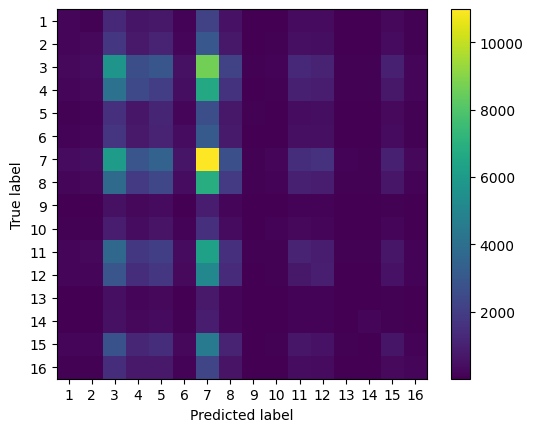

In [24]:
ConfusionMatrixDisplay.from_predictions(y_test,predictions,include_values=False)
plt.show()

El código utiliza la librería joblib para guardar objetos de Python en archivos para su posterior carga y uso, en este caso se guardará el modelo

In [6]:
jb.dump(svc, "rfc.lzma")

['rfc.lzma']